recognize based on id="t11"
1. take picture from id="cpt_cd", below is 'img', take 'src'
2. teseract picture 
3. write txt into id="f15" name="cpt_t"
4. send with: cpt_a()
    
    cpt_t=document.getElementsByName('cpt_t')

    var b = cpt_t[0].value.toLowerCase();
    
    a.open('GET', '//stooq.com/q/l/s/?t=' + b, true);
    
    a.setRequestHeader('Content-type', 'application/x-www-form-urlencoded');
    
    a.send(null);
5. refresh page with: cpt_g(0,0,1)


In [1]:
from PIL import Image, ImageEnhance, ImageFilter
import pytesseract as tes
import cv2
import imutils

def cv2show(img):
    cv2.imshow('test',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [42]:
img_orig=cv2.imread('stooq.png')
img=cv2.cvtColor(img_orig,cv2.COLOR_BGR2GRAY)
img=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

hori_ker=cv2.getStructuringElement(cv2.MORPH_RECT,(20,1))
vert_ker=cv2.getStructuringElement(cv2.MORPH_RECT,(1,20))
hor_lines= cv2.morphologyEx(img,cv2.MORPH_GRADIENT,hori_ker, iterations=2)
ver_lines= cv2.morphologyEx(img,cv2.MORPH_GRADIENT,vert_ker, iterations=2)
hor_lines=cv2.bitwise_not(hor_lines)
ver_lines=cv2.bitwise_not(ver_lines)



In [5]:
cv2show(ver_lines)

In [60]:
cv2show(hor_lines)

In [48]:
cv2show(img)

In [43]:
result=cv2.bitwise_xor(img,hor_lines)
result=cv2.bitwise_or(result,ver_lines)
cv2.imwrite('./stooq_trans.png', result)

True

In [44]:
cnts,h=cv2.findContours(result,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
img_cnt=cv2.drawContours(img_orig*0,cnts,-1,(255,255,255),1)
img_cnt=cv2.cvtColor(img_cnt,cv2.COLOR_BGR2GRAY)
img_cnt=cv2.threshold(img_cnt,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
cv2.imwrite('./stooq_trans.png', img_cnt)

True

In [47]:
cv2show(img_orig)

In [22]:
cv2show(img_cnt)

In [45]:
cv2.imwrite('stooq_final.png',cv2.bitwise_xor(result,img_cnt))

True

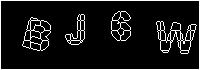

In [20]:
imge=Image.open('stooq_trans.png')
imge

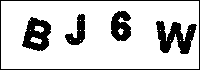

In [46]:
imge=Image.open('stooq_final.png')
imge

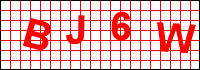

In [49]:
imge=Image.open('stooq.png')
imge

In [40]:
tes.image_to_string(imge)

' \n\n \n\n \n\n \n\n \n\x0c'